In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
#Reading dataset
Tesla=pd.read_csv("Tesla.csv")

In [3]:
#First five records
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
#Calculating moving average
Mavg_100_days=Tesla.Close.rolling(100).mean()

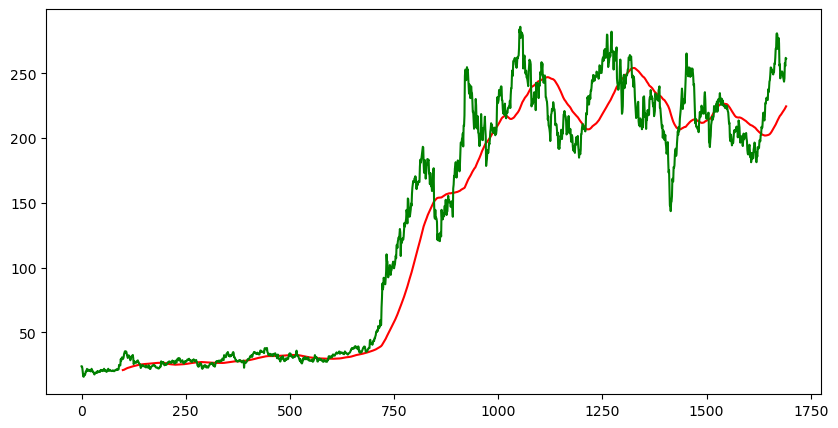

In [5]:
#Plotting
plt.figure(figsize=(10,5))
plt.plot(Mavg_100_days,'red')
plt.plot(Tesla.Close,'green')
plt.show()

In [6]:
#Dropping null values
Tesla.dropna(inplace=True)

In [7]:
#Splitting data into train and test
Tesla_train=pd.DataFrame(Tesla.Close[0:int(len(Tesla)*0.80)])
Tesla_test=pd.DataFrame(Tesla.Close[int(len(Tesla)*0.80):len(Tesla)])

In [8]:
#For model traning
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [9]:
Tesla_train_scale=scaler.fit_transform(Tesla_train)

In [10]:
x=[]
y=[]
for i in range(100,Tesla_train_scale.shape[0]):
    x.append(Tesla_train_scale[i-100:i])
    y.append(Tesla_train_scale[i,0])

In [11]:
x,y=np.array(x),np.array(y)

In [12]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from keras.layers import Input

In [13]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [14]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 271ms/step - loss: 0.1222
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 251ms/step - loss: 0.0129
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 257ms/step - loss: 0.0116
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - loss: 0.0158
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 268ms/step - loss: 0.0086
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 256ms/step - loss: 0.0076
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step - loss: 0.0081
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - loss: 0.0081
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - loss: 0.0083
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 273ms/step - loss: 0.0080
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 272ms/step - loss: 0.0078
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 279ms/step - loss: 0.0070
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - loss: 0.0070
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 269ms/step - loss: 0.0119
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [16]:
Last_100_days=Tesla_train.tail(100)

In [17]:
Tesla_test=pd.concat([Last_100_days,Tesla_test],ignore_index=True)

In [23]:
Tesla_test_scale=scaler.fit_transform(Tesla_test)

In [25]:
x=[]
y=[]
for i in range(100,Tesla_test_scale.shape[0]):
    x.append(Tesla_test_scale[i-100:i])
    y.append(Tesla_test_scale[i,0])

In [27]:
x,y=np.array(x),np.array(y)

In [29]:
y_pred=model.predict(x)

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step


In [31]:
scale=1/scaler.scale_

In [33]:
y_pred=y_pred*scale

In [35]:
y=y*scale

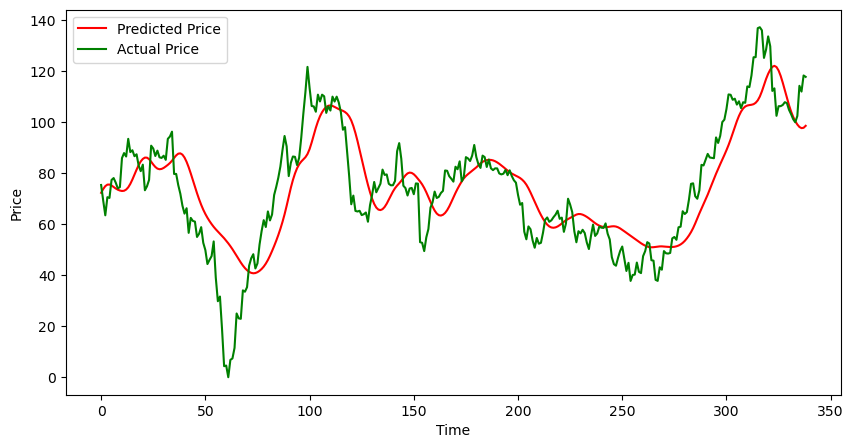

In [37]:
plt.figure(figsize=(10,5))
plt.plot(y_pred,'red',label='Predicted Price')
plt.plot(y,'green',label='Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [39]:
model.save('Stock Price Prediction.keras')